In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv(
    r"C:\Users\monish.krishnan\Desktop\Multilable classification\train.csv",
    encoding="latin1",
)

<IPython.core.display.Javascript object>

In [4]:
df2 = df.drop(["id", "comment_text"], axis=1)
counts = []

<IPython.core.display.Javascript object>

In [5]:
categories = list(df2.columns.values)
for i in categories:
    counts.append((i, df2[i].sum()))
df3 = pd.DataFrame(counts, columns=["category", "count"])

<IPython.core.display.Javascript object>

In [9]:
df3

,category,count
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


<IPython.core.display.Javascript object>

Text(0.5, 0, 'category')

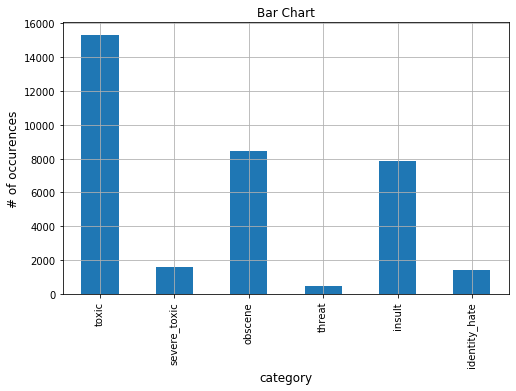

<IPython.core.display.Javascript object>

In [6]:
df3.plot(x="category", y="count", kind="bar", legend=False, grid=True, figsize=(8, 5))
plt.title("Bar Chart")
plt.ylabel("# of occurences", fontsize=12)
plt.xlabel("category", fontsize=12)

In [7]:
rowsum = df.iloc[:, 2:].sum(axis=1)
x = rowsum.value_counts()

<IPython.core.display.Javascript object>

Text(0, 0.5, '# of occurrences')

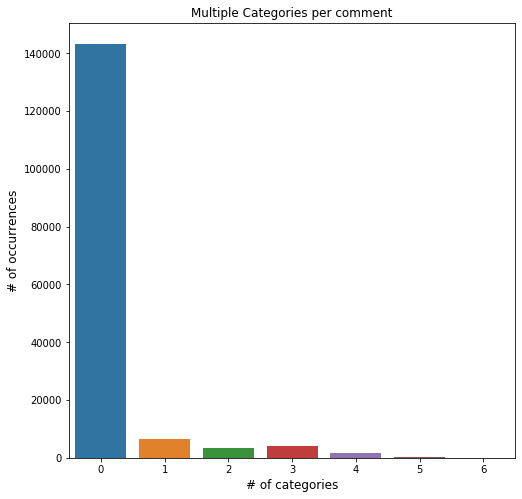

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple Categories per comment")
plt.xlabel("# of categories", fontsize=12)
plt.ylabel("# of occurrences", fontsize=12)

In [11]:
print("Percentage of comments that are not labled")
print((x[0] / len(df)) * 100)

Percentage of comments that are not labled
89.83211235124176


<IPython.core.display.Javascript object>

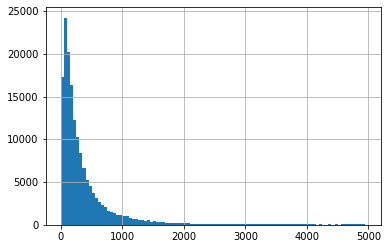

<IPython.core.display.Javascript object>

In [12]:
lens = df.comment_text.str.len()
lens.hist(bins=np.arange(0, 5000, 50))

In [13]:
# function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip(" ")
    return text

<IPython.core.display.Javascript object>

In [14]:
df["comment_text"] = df["comment_text"].map(lambda com: clean_text(com))

<IPython.core.display.Javascript object>

In [15]:
df["comment_text"]

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i am s...
2         hey man i am really not trying to edit war it ...
3         more i can not make any real suggestions on im...
4         you sir are my hero any chance you remember wh...
5         congratulations from me as well use the tools ...
6              cocksucker before you piss around on my work
7         your vandalism to the matt shirvington article...
8         sorry if the word nonsense was offensive to yo...
9         alignment on this subject and which are contra...
10        fair use rationale for image wonju jpg thanks ...
11        bbq be a man and lets discuss it maybe over th...
12        hey what is it talk what is it an exclusive gr...
13        before you start throwing accusations and warn...
14        oh and the girl above started her arguments wi...
15        juelz santanas age in 2002 juelz santana was 1...
16        bye do not look come or think 

<IPython.core.display.Javascript object>

In [16]:
categories = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

<IPython.core.display.Javascript object>

In [17]:
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(106912,)
(52659,)


<IPython.core.display.Javascript object>

In [18]:
NB_pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer(stop_words=stop_words)),
        ("clf", OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
    ]
)

<IPython.core.display.Javascript object>

In [21]:
for category in categories:
    print("{}".format(category))
    NB_pipeline.fit(X_train, train[category])
    prediction = NB_pipeline.predict(X_test)
    print("Accuracy {}".format(accuracy_score(test[category], prediction)))

toxic
Accuracy 0.9192350785240889
severe_toxic
Accuracy 0.9900112041626312
obscene
Accuracy 0.9515752293055318
threat
Accuracy 0.9971135038644866
insult
Accuracy 0.9517271501547694
identity_hate
Accuracy 0.9910556600011394


<IPython.core.display.Javascript object>

In [20]:
X_train

29614     sockpuppetry case you have been accused of soc...
109036    i have read the archives and various national ...
110790    wikipedia is an encyclopedia yes lyrics which ...
80583     such as when you mention â azeris are genetica...
30047     werdna rfa hi i am still slightly wet behind t...
55148     will would you say that beverly hills high sch...
109908    this article appears to have a motto spot and ...
96489     clement freud should clem freud be included in...
148494    well first off murphy is not allowed to edit h...
131011    to edit please create an account and log indue...
58919     what are you like the owner of this site reall...
149754                              am a huge ass and lameo
30354          repent bastard 666 2x above holy 333 trinity
129718    you turd burgling stalinist get some talent or...
124215    hispanic what the hell do hispanics have to do...
14732     link to the historical author of anong bahumon...
835       words of encouragement to user

<IPython.core.display.Javascript object>

In [24]:
SVC_pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer(stop_words=stop_words)),
        ("clf", OneVsRestClassifier(LinearSVC(), n_jobs=1)),
    ]
)

<IPython.core.display.Javascript object>

In [25]:
for category in categories:
    print("{}".format(category))
    SVC_pipeline.fit(X_train, train[category])
    prediction = SVC_pipeline.predict(X_test)
    print("Accuracy {}".format(accuracy_score(test[category], prediction)))

toxic
Accuracy 0.9600068364382157
severe_toxic
Accuracy 0.9906948479842003
obscene
Accuracy 0.9788830019559809
threat
Accuracy 0.9974363356691164
insult
Accuracy 0.971135038644866
identity_hate
Accuracy 0.9919861752027194


<IPython.core.display.Javascript object>

In [26]:
LogReg_pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer(stop_words=stop_words)),
        ("clf", OneVsRestClassifier(LogisticRegression(solver="sag"), n_jobs=1)),
    ]
)

<IPython.core.display.Javascript object>

In [27]:
for category in categories:
    print("{}".format(category))
    LogReg_pipeline.fit(X_train, train[category])
    prediction = LogReg_pipeline.predict(X_test)
    print("Accuracy {}".format(accuracy_score(test[category], prediction)))

toxic
Accuracy 0.9548415275641391
severe_toxic
Accuracy 0.9910746501072941
obscene
Accuracy 0.9760724662450863
threat
Accuracy 0.9973603752444976
insult
Accuracy 0.9687422852693747
identity_hate
Accuracy 0.991758293928863


<IPython.core.display.Javascript object>